TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans

data1 = pd.read_excel('CDR_6_MRIfull.xlsx')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA    

original shape:    (1600, 139)
transformed shape: (1600, 2)


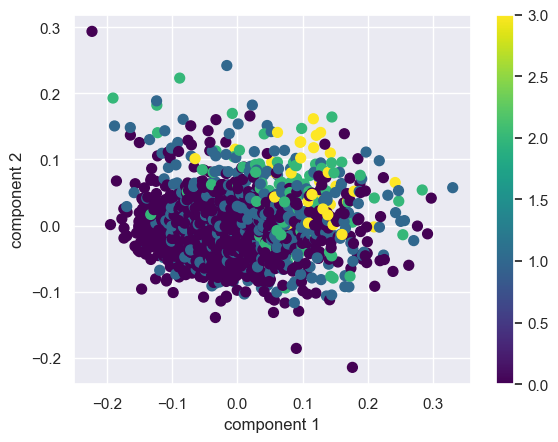

In [9]:
# PCA

X=data1.iloc[:,15:]
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

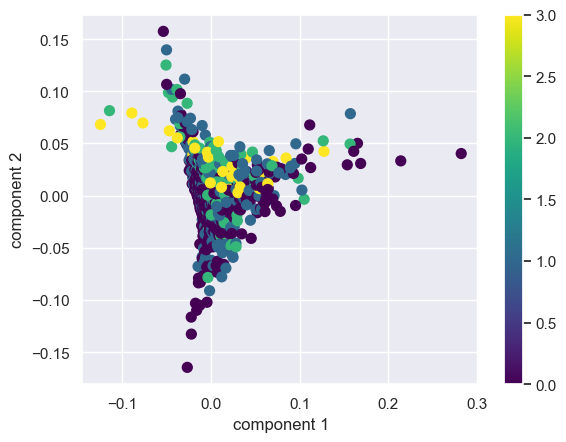

In [10]:
# LLE

from sklearn.manifold import LocallyLinearEmbedding

    
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

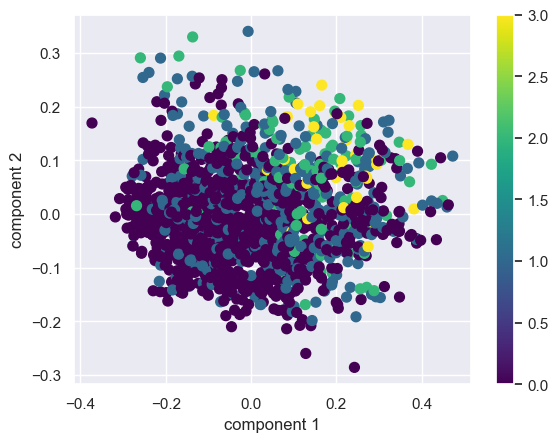

In [11]:
# ISOMAP

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier 

For this task, please use them with their default parameter values and provide the classification report and confusion matrix for each of these.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import LocallyLinearEmbedding, TSNE

In [20]:
# PCA
pca = PCA(n_components=7)
fit_data = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for PCA:",accuracy_score(y_test, y_pred))


# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for PCA:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for PCA:",accuracy_score(y_test, y_pred))

GNB Accuracy for PCA: 0.665625
SVM Accuracy for PCA: 0.684375
RFC Accuracy for PCA: 0.659375


In [21]:
# LLE
lle = LocallyLinearEmbedding(n_components=7, n_neighbors=10)
fit_data = lle.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for LLE:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for LLE:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for LLE:",accuracy_score(y_test, y_pred))

GNB Accuracy for LLE: 0.49375
SVM Accuracy for LLE: 0.675
RFC Accuracy for LLE: 0.59375


In [22]:
# ISOMAP
iso = Isomap(n_components=7)
fit_data = iso.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

GNB Accuracy for ISOMAP: 0.603125
SVM Accuracy for ISOMAP: 0.671875
RFC Accuracy for ISOMAP: 0.65625


TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations. 

In [52]:
import pandas as pd
from sklearn.cluster import KMeans

data2 = pd.read_excel("CDR_6_MRI_selected.xlsx")
data2

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

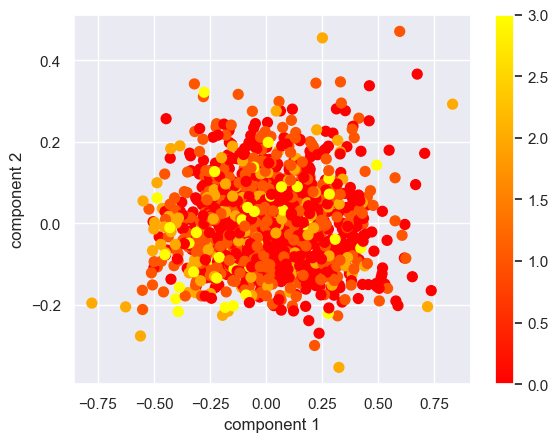

In [66]:
#PCA for New DS

Y=data2.iloc[:,15:]
pca = PCA(n_components=2)
pca.fit(Y)
Y_pca = pca.transform(Y)


plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

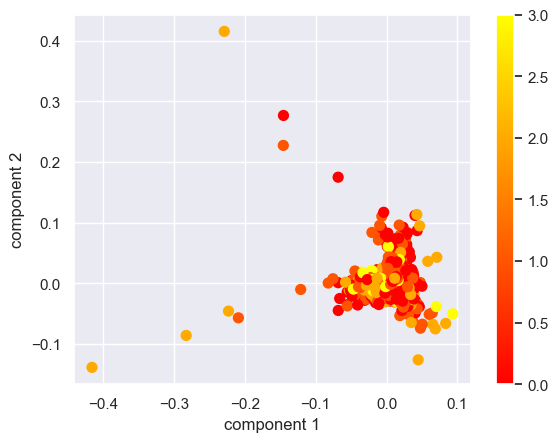

In [68]:
#LLE for New DS

from sklearn.manifold import LocallyLinearEmbedding, TSNE

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
Y_lle = lle.fit_transform(Y)

plt.scatter(Y_lle[:, 0], Y_lle[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

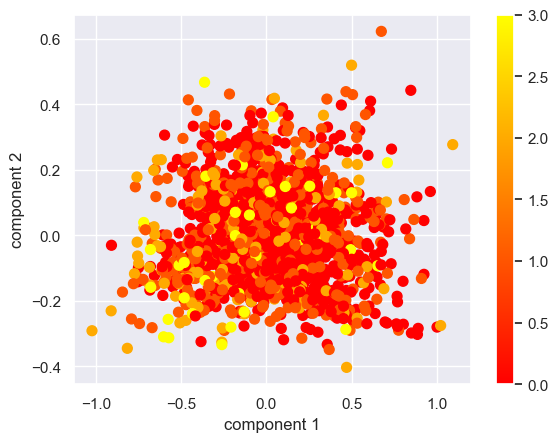

In [69]:
#Isomap for New DS

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
Y_iso = iso.fit_transform(Y)

plt.scatter(Y_iso[:, 0], Y_iso[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
#PCA for new DS

pca = PCA(n_components=7)
fitted_data = pca.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.2, random_state=42)
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.675
SVM Accuracy for new dataset: 0.65625
RFC Accuracy for new dataset: 0.671875


In [76]:
#Isomap for New DS

iso = Isomap(n_components=7)
fitted_data = pca.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

GNB Accuracy for ISOMAP: 0.675
SVM Accuracy for ISOMAP: 0.65625
RFC Accuracy for ISOMAP: 0.659375


In [80]:
# LLE for New DS

lle = LocallyLinearEmbedding(n_components=7, n_neighbors=10)
fitted_data = lle.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.62
SVM Accuracy for new dataset: 0.6275
RFC Accuracy for new dataset: 0.6075


In [81]:
# ISOMAP for New DS

iso = Isomap(n_components=7)
fitted_data = iso.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.6375
SVM Accuracy for new dataset: 0.635
RFC Accuracy for new dataset: 0.59


In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# PCA
pca = PCA(n_components=5)
fitted_data = pca.fit_transform(Y)

# LLE
lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10)
fitted_data = lle.fit_transform(Y)

# ISOMAP
iso = Isomap(n_components=5)
fitted_data = iso.fit_transform(Y)


# TSNE
tsne = TSNE(n_components=3)
fitted_data = tsne.fit_transform(Y)

# MinMaxScaler
scaler = MinMaxScaler()
fitted_data = scaler.fit_transform(fitted_data)


X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)


# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for PCA-LLE-ISO-TSNE:",accuracy_score(y_test, y_pred))

# GridSearchCV
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print("RFC Accuracy for PCA-LLE-ISO-TSNE with GridSearchCV:",accuracy_score(y_test, grid_predictions))

C:\Users\tgork\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tgork\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


RFC Accuracy for PCA-LLE-ISO-TSNE: 0.61
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ......max_depth=5, n_estimators=10;, score=0.625 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=10;, score=0.617 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=10;, score=0.637 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=10;, score=0.633 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=10;, score=0.629 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=20;, score=0.642 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=20;, score=0.629 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=20;, score=0.621 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=20;, score=0.625 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=20;, score=0.642 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=30;, score=0.633 total time=   0.0s
[CV 2/

[CV 5/5] END .....max_depth=15, n_estimators=10;, score=0.633 total time=   0.0s
[CV 1/5] END .....max_depth=15, n_estimators=20;, score=0.575 total time=   0.0s
[CV 2/5] END .....max_depth=15, n_estimators=20;, score=0.596 total time=   0.3s
[CV 3/5] END .....max_depth=15, n_estimators=20;, score=0.583 total time=   0.0s
[CV 4/5] END .....max_depth=15, n_estimators=20;, score=0.621 total time=   0.0s
[CV 5/5] END .....max_depth=15, n_estimators=20;, score=0.608 total time=   0.0s
[CV 1/5] END .....max_depth=15, n_estimators=30;, score=0.583 total time=   0.0s
[CV 2/5] END .....max_depth=15, n_estimators=30;, score=0.600 total time=   0.0s
[CV 3/5] END .....max_depth=15, n_estimators=30;, score=0.588 total time=   0.0s
[CV 4/5] END .....max_depth=15, n_estimators=30;, score=0.621 total time=   0.0s
[CV 5/5] END .....max_depth=15, n_estimators=30;, score=0.650 total time=   0.0s
[CV 1/5] END .....max_depth=15, n_estimators=40;, score=0.583 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 3/5] END .....max_depth=25, n_estimators=20;, score=0.596 total time=   0.0s
[CV 4/5] END .....max_depth=25, n_estimators=20;, score=0.613 total time=   0.0s
[CV 5/5] END .....max_depth=25, n_estimators=20;, score=0.608 total time=   0.0s
[CV 1/5] END .....max_depth=25, n_estimators=30;, score=0.575 total time=   0.1s
[CV 2/5] END .....max_depth=25, n_estimators=30;, score=0.575 total time=   0.0s
[CV 3/5] END .....max_depth=25, n_estimators=30;, score=0.583 total time=   0.0s
[CV 4/5] END .....max_depth=25, n_estimators=30;, score=0.600 total time=   0.0s
[CV 5/5] END .....max_depth=25, n_estimators=30;, score=0.621 total time=   0.0s
[CV 1/5] END .....max_depth=25, n_estimators=40;, score=0.575 total time=   0.1s
[CV 2/5] END .....max_depth=25, n_estimators=40;, score=0.604 total time=   0.1s
[CV 3/5] END .....max_depth=25, n_estimators=40;, score=0.575 total time=   0.1s
[CV 4/5] END .....max_depth=25, n_estimators=40;, score=0.608 total time=   0.1s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=35, n_estimators=20;, score=0.592 total time=   0.5s
[CV 1/5] END .....max_depth=35, n_estimators=30;, score=0.550 total time=   0.1s
[CV 2/5] END .....max_depth=35, n_estimators=30;, score=0.579 total time=   0.3s
[CV 3/5] END .....max_depth=35, n_estimators=30;, score=0.596 total time=   0.6s
[CV 4/5] END .....max_depth=35, n_estimators=30;, score=0.604 total time=   0.1s
[CV 5/5] END .....max_depth=35, n_estimators=30;, score=0.637 total time=   0.1s
[CV 1/5] END .....max_depth=35, n_estimators=40;, score=0.575 total time=   0.3s
[CV 2/5] END .....max_depth=35, n_estimators=40;, score=0.592 total time=   0.3s
[CV 3/5] END .....max_depth=35, n_estimators=40;, score=0.575 total time=   0.1s
[CV 4/5] END .....max_depth=35, n_estimators=40;, score=0.621 total time=   0.2s
[CV 5/5] END .....max_depth=35, n_estimators=40;, score=0.646 total time=   0.1s
[CV 1/5] END .....max_depth=35, n_estimators=50;, score=0.571 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=45, n_estimators=30;, score=0.588 total time=   0.3s
[CV 3/5] END .....max_depth=45, n_estimators=30;, score=0.608 total time=   0.1s
[CV 4/5] END .....max_depth=45, n_estimators=30;, score=0.613 total time=   0.1s
[CV 5/5] END .....max_depth=45, n_estimators=30;, score=0.608 total time=   0.1s
[CV 1/5] END .....max_depth=45, n_estimators=40;, score=0.562 total time=   0.5s
[CV 2/5] END .....max_depth=45, n_estimators=40;, score=0.592 total time=   0.2s
[CV 3/5] END .....max_depth=45, n_estimators=40;, score=0.600 total time=   0.1s
[CV 4/5] END .....max_depth=45, n_estimators=40;, score=0.604 total time=   0.2s
[CV 5/5] END .....max_depth=45, n_estimators=40;, score=0.625 total time=   0.3s
[CV 1/5] END .....max_depth=45, n_estimators=50;, score=0.583 total time=   0.1s
[CV 2/5] END .....max_depth=45, n_estimators=50;, score=0.604 total time=   0.1s
[CV 3/5] END .....max_depth=45, n_estimators=50;, score=0.613 total time=   0.2s
[CV 4/5] END .....max_depth=

TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE. 

C:\Users\tgork\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tgork\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


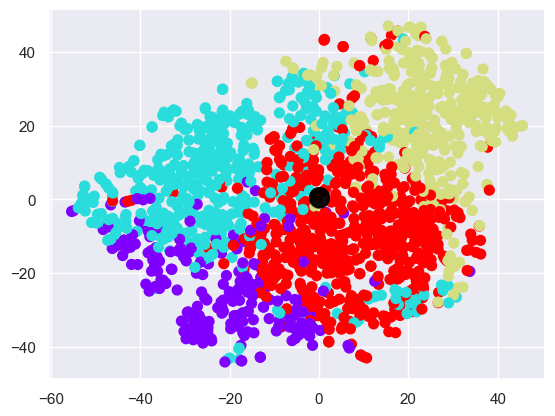

In [84]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data3 = data2.iloc[:, 16:]
scaler = MinMaxScaler()
fitted_data = scaler.fit_transform(data3)

kmeans = KMeans(n_clusters=4)
kmeans.fit(fitted_data)
y_kmeans = kmeans.predict(fitted_data)

tsne = TSNE(n_components=2)
fitted_data = tsne.fit_transform(fitted_data)

plt.scatter(fitted_data[:, 0], fitted_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

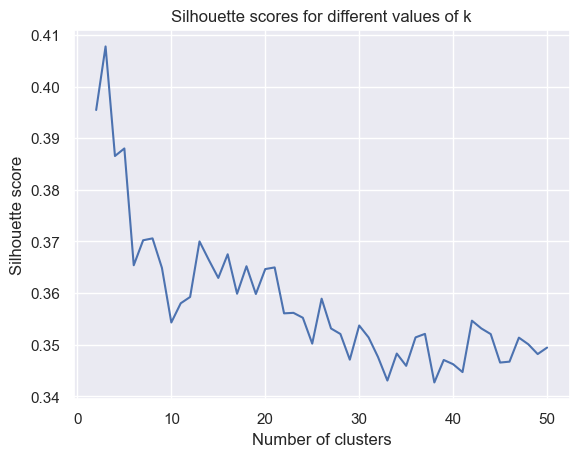

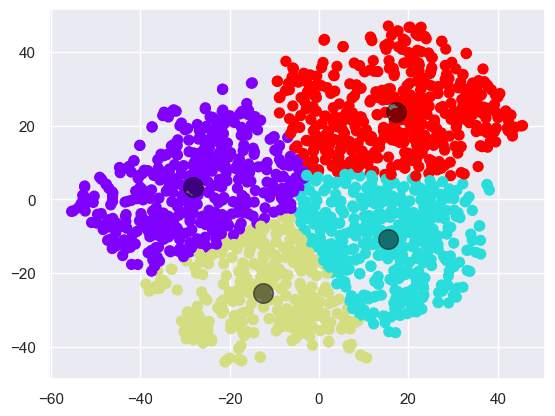

In [90]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 51):
    silhouette_scores.append(silhouette_score(fitted_data, KMeans(n_clusters = n_cluster).fit_predict(fitted_data)))
    
plt.plot(range(2, 51), silhouette_scores)
plt.title('Silhouette scores for different values of k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


kmeans = KMeans(n_clusters=4)
kmeans.fit(fitted_data)
y_kmeans = kmeans.predict(fitted_data)
    
plt.scatter(fitted_data[:, 0], fitted_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()